<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-no-class_weight" data-toc-modified-id="DecisionTreeClassifier-no-class_weight-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DecisionTreeClassifier no class_weight</a></span></li><li><span><a href="#RandomForestClassifier-no-class_weight" data-toc-modified-id="RandomForestClassifier-no-class_weight-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier no class_weight</a></span></li><li><span><a href="#LogisticRegression-no-class-weight" data-toc-modified-id="LogisticRegression-no-class-weight-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LogisticRegression no class weight</a></span></li><li><span><a href="#Подводя-итог" data-toc-modified-id="Подводя-итог-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подводя итог</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-downsalpled" data-toc-modified-id="DecisionTreeClassifier-downsalpled-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier downsalpled</a></span></li><li><span><a href="#DecisionTreeClassifier-upsmapled" data-toc-modified-id="DecisionTreeClassifier-upsmapled-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeClassifier upsmapled</a></span></li><li><span><a href="#DecisionTreeClassifier-with-class_weight-balanced" data-toc-modified-id="DecisionTreeClassifier-with-class_weight-balanced-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DecisionTreeClassifier with class_weight balanced</a></span></li><li><span><a href="#LogisticRegression-with-class-balanced" data-toc-modified-id="LogisticRegression-with-class-balanced-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LogisticRegression with class balanced</a></span></li><li><span><a href="#RandomForestClassifier-upsampled" data-toc-modified-id="RandomForestClassifier-upsampled-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>RandomForestClassifier upsampled</a></span></li><li><span><a href="#RandomForestClassifier-downsampled" data-toc-modified-id="RandomForestClassifier-downsampled-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>RandomForestClassifier downsampled</a></span></li><li><span><a href="#RandomForestClassifier-class-balanced" data-toc-modified-id="RandomForestClassifier-class-balanced-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>RandomForestClassifier class balanced</a></span></li><li><span><a href="#Один-график" data-toc-modified-id="Один-график-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Один график</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры.Нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Подключим необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,roc_auc_score, roc_curve
from sklearn.utils import shuffle

Прочитаем датасет

In [13]:
df = pd.read_csv('/datasets/Churn.csv')

Использование столбцов с комбинацией заглавных и строчных букв это неудобно, поэтому переименуем столбцы на строчные буквы

In [14]:
df = df.rename(columns = {'CreditScore':'creditscore',
                          'Age':'age',
                          'Tenure':'tenure',
                          'Balance':'balance',
                          'NumOfProducts':'numofprod',
                         'HasCrCard':'hascard',
                          'IsActiveMember':'actmemb',
                         'EstimatedSalary':'salary',
                          'Exited':'exited'})

Далее удалим ненужные столбцы, которые никак не повлияют на обучение модели и очень сильно коррелируют между собой

In [15]:
df = df.drop(['RowNumber','Surname','CustomerId'], axis = 1 )

Проверим сколько у нас вариантов значений столбца Geography

In [16]:
df['Geography'].nunique()

3

Далее используем One Heat Encoding и закодируем строковые столбцы в численные с помощью функции get_dummies

In [17]:
df_ohe = pd.get_dummies(df,drop_first = True)

Переименовываем получившиеся столбцы

In [18]:
df_ohe = df_ohe.rename(columns = {'Geography_Germany':'isgermany',
                                  'Geography_Spain':'isspain',
                                 'Gender_Male':'ismale'})

Далее заполним NaN значения в столбце tenure медианой

<AxesSubplot:>

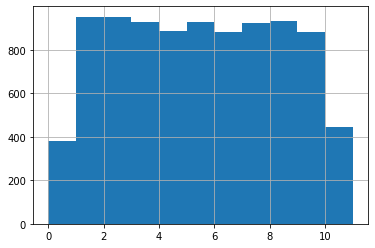

In [19]:
df_ohe['tenure'].hist(bins=range(12))

In [20]:
df_ohe['tenure'] = df_ohe['tenure'].fillna(df_ohe['tenure'].median()).astype(int)

<AxesSubplot:>

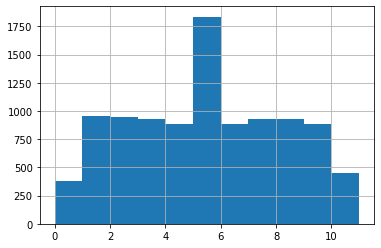

In [21]:
df_ohe['tenure'].hist(bins=range(12))

Далее выделим целевой признак в переменную Y, а все остальные столбцы в переменную X

In [23]:
X = df_ohe.drop(['exited'],axis = 1 )
y = df_ohe['exited']

Разделим выбору на тренировочную,валидационную и тестовую

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify = y)

In [25]:
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5, random_state=42,stratify = y_test)

In [26]:
print('Количество строк до и после оверсемплинга:',X_train.shape[0],)
print('Баланс классов train:')
print(y_train.value_counts())
print('Баланс классов test:')
print(y_test.value_counts())
print('Баланс классов valid:')
print(y_valid.value_counts())

Количество строк до и после оверсемплинга: 6000
Баланс классов train:
0    4778
1    1222
Name: exited, dtype: int64
Баланс классов test:
0    1593
1     407
Name: exited, dtype: int64
Баланс классов valid:
0    1592
1     408
Name: exited, dtype: int64


Уже сейчас мы видим дисбаланс классов. Нулей примерно в 4 раза больше чем единиц

Проверим размеры полученных выборок

In [27]:
print(df_ohe.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(10000, 12)
(6000, 11)
(2000, 11)
(2000, 11)


Всё верно, далее можно работать с полученными стообцами в тренировочной выборке

Запишем названия числовых столбцов в отдельный массив

In [28]:
numeric = ['creditscore','age','tenure','balance','numofprod','salary']

Воспользуемся функцией StandartScaller для стандартизации всех предикторов

In [29]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(X_train[numeric])

StandardScaler()

In [30]:
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

## Исследование задачи

Создадим функцию для выявления наилучших параметров всех моделей на кросс-валидации.

In [31]:
def GridSearch (est,params,X_train,y_train):
    grid_search_cv_est = GridSearchCV(est,params,cv = 5)
    grid_search_cv_est.fit(X_train,y_train)
    best_param = grid_search_cv_est.best_params_
    best_est_est = grid_search_cv_est.best_estimator_
    return best_est_est,best_param

Так же создадим функцию для вычисления F1 меры на разных порогах активационной функции. Так же эта функция будет выводить AUC-ROC кривую.

In [32]:
def F1Roc(best_clf,X_valid,y_valid):
    bestF1 = 0
    bestthreshold = 0
    probabilities_valid = best_clf.predict_proba(X_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    for threshold in np.arange(0, 0.55, 0.04):
        predicted_valid = probabilities_one_valid > threshold
        print(f'На значении: {threshold} F1-мера равна: {f1_score(y_valid,predicted_valid)}')
        if f1_score(y_valid,predicted_valid) > bestF1:
            bestF1 = round(f1_score(y_valid,predicted_valid),4)
            bestthreshold = threshold
    print('---')
    auc_roc = round(roc_auc_score(y_valid, probabilities_one_valid),3)
    print(f'Максимальная F1-мера равна: {bestF1} На пороге равном: {bestthreshold}, ROC-score: {auc_roc}')
    fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)
    plt.figure()

    plt.plot(fpr, tpr)

    # ROC-кривая случайной модели (выглядит как прямая)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
    plt.title("ROC-кривая")
    
    return auc_roc, bestF1, probabilities_one_valid

Для классификации используем 3 варианта моделей:

1) DecisionTreeClassifier

2) LogisticRegression

3) RandomForestClassifier

Далее посмотрим на метрики каждой из моделей обучив её в трёх случаях:

1) Без параметра class_weight

2) С параметром class_weight = 'balanced'

3) Используя приём upsampled

4) Используя приём downsampled

Найдём F1-меру в каждом из случаев, построим ROC-AUC кривую и найдём площадь под ней и выберем лучшую модель.

Обучим решающее дерево без баланса классов

### DecisionTreeClassifier no class_weight

Здесь и ниже создаём нужную нам модель, создаём словарь с параметрами которые необходимо перебрать с помощью GridSearchCV. Обучаем модель и на кросс-валидации находим оптимальные параметры.

In [33]:
dtc = DecisionTreeClassifier(criterion = 'gini',random_state = 42)
params = {'max_depth': range(1,20)}
best_clf_DTC_ncw,best_param = GridSearch(dtc,params,X_train,y_train)

Вычисляем значение F1-меры.

In [34]:
prediction_values = best_clf_DTC_ncw.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.5528455284552846


Варьируя значения порога найдём оптимальное значение на котором F1 максимальна. Построим ROC-кривую и вычислим площадь под ней.

На значении: 0.0 F1-мера равна: 0.33666666666666667
На значении: 0.04 F1-мера равна: 0.3730715287517532
На значении: 0.08 F1-мера равна: 0.43291995490417134
На значении: 0.12 F1-мера равна: 0.5417348608837971
На значении: 0.16 F1-мера равна: 0.5919701213818861
На значении: 0.2 F1-мера равна: 0.5919701213818861
На значении: 0.24 F1-мера равна: 0.5838041431261771
На значении: 0.28 F1-мера равна: 0.5828571428571429
На значении: 0.32 F1-мера равна: 0.5856481481481481
На значении: 0.36 F1-мера равна: 0.5741758241758241
На значении: 0.4 F1-мера равна: 0.5843023255813953
На значении: 0.44 F1-мера равна: 0.5843023255813953
На значении: 0.48 F1-мера равна: 0.5843023255813953
На значении: 0.52 F1-мера равна: 0.5306799336650083
---
Максимальная F1-мера равна: 0.592 На пороге равном: 0.16, ROC-score: 0.844


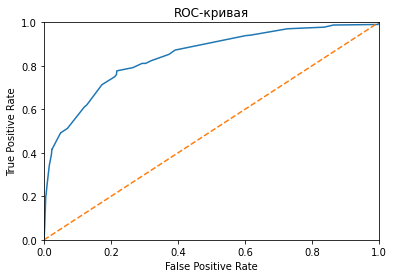

In [35]:
auc_roc1,medida1,probabilities_one_valid1 = F1Roc(best_clf_DTC_ncw,X_valid,y_valid)

Модель уже даёт хорошие метрики, больше тех,чем необходимы нам в задании, но нет предела совершенству, попробуем ещё.

Обучим RandomForest без баланса классов.

### RandomForestClassifier no class_weight

In [36]:
rfc = RandomForestClassifier(random_state = 42)
params = {'criterion':['gini','entropy'],
          'max_depth': range(5,15),
          'n_estimators': range(5,15)}
best_clf_RFC_ncw,best_param = GridSearch(rfc,params,X_train,y_train)

In [37]:
prediction_values = best_clf_RFC_ncw.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.5683563748079877


На значении: 0.0 F1-мера равна: 0.3394342762063228
На значении: 0.04 F1-мера равна: 0.3992035838725734
На значении: 0.08 F1-мера равна: 0.4539589442815249
На значении: 0.12 F1-мера равна: 0.507482993197279
На значении: 0.16 F1-мера равна: 0.5505011565150347
На значении: 0.2 F1-мера равна: 0.5828274067649609
На значении: 0.24 F1-мера равна: 0.6035502958579881
На значении: 0.28 F1-мера равна: 0.6221248630887185
На значении: 0.32 F1-мера равна: 0.6269368295589989
На значении: 0.36 F1-мера равна: 0.6214833759590793
На значении: 0.4 F1-мера равна: 0.6147540983606558
На значении: 0.44 F1-мера равна: 0.6103151862464185
На значении: 0.48 F1-мера равна: 0.580060422960725
На значении: 0.52 F1-мера равна: 0.5593750000000001
---
Максимальная F1-мера равна: 0.6269 На пороге равном: 0.32, ROC-score: 0.865


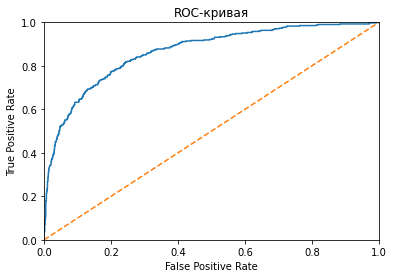

In [38]:
auc_roc2,medida2,probabilities_one_valid2 = F1Roc(best_clf_RFC_ncw,X_valid,y_valid)

Отличные метрики! Может можно ещё лучше? Продолжаем.

Обучим LogisticRegression без баланса классов.

### LogisticRegression no class weight

In [39]:
lrc = LogisticRegression(random_state=42, solver='liblinear')
params = {'max_iter': [10,50,100,500,100]}
best_clf_lr_ncw,best_param = GridSearch(lrc,params,X_train,y_train)

In [40]:
prediction_values = best_clf_lr_ncw.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.32792792792792796


На значении: 0.0 F1-мера равна: 0.3388704318936877
На значении: 0.04 F1-мера равна: 0.3535528596187175
На значении: 0.08 F1-мера равна: 0.39298245614035093
На значении: 0.12 F1-мера равна: 0.43812907045589106
На значении: 0.16 F1-мера равна: 0.47612359550561806
На значении: 0.2 F1-мера равна: 0.5107084019769358
На значении: 0.24 F1-мера равна: 0.516003879728419
На значении: 0.28 F1-мера равна: 0.5259668508287293
На значении: 0.32 F1-мера равна: 0.5178791615289766
На значении: 0.36 F1-мера равна: 0.4925170068027211
На значении: 0.4 F1-мера равна: 0.45199409158050224
На значении: 0.44 F1-мера равна: 0.39542483660130723
На значении: 0.48 F1-мера равна: 0.34494773519163763
На значении: 0.52 F1-мера равна: 0.29811320754716986
---
Максимальная F1-мера равна: 0.526 На пороге равном: 0.28, ROC-score: 0.791


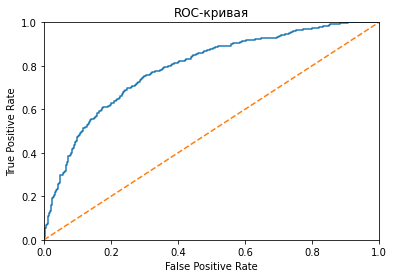

In [41]:
auc_roc3,medida3,probabilities_one_valid3 = F1Roc(best_clf_lr_ncw,X_valid,y_valid)

### Подводя итог
можно сказать , что самой лучшей моделью без балансировки классов является RandomForest с F1-метрикой равной 0.533 на пороге 0.36 где ROC-метрика равна 0.83

Далее необходимо написать 2 функции. Функция с названием upsample будет добавлять элементы в выборку, а функция downsample удалять элементы из выборки

Метрики AUC-ROC и F1 ведут себя согласованно. Уменьшается AUC-ROC -> уменьшается F1. Однако, AUC-ROC уменьшается сильно медленнее чем F1

## Борьба с дисбалансом

In [42]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(X_train, y_train, 4)

In [43]:
print('Количество строк до и после оверсемплинга:',X_train.shape[0],",", features_upsampled.shape[0])
print('Баланс классов до оверсемплинга:')
print(target_upsampled.value_counts())
print('Баланс классов после оверсемплинга:')
print(y_train.value_counts())

In [45]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(X_train, y_train, 0.25)

In [46]:
print('Количество строк до и после оверсемплинга:',X_train.shape[0],",", features_upsampled.shape[0])
print('Баланс классов до андерсемплинга:')
print(y_train.value_counts())
print('Баланс классов после андерсемплинга:')
print(target_downsampled.value_counts())

Количество строк до и после оверсемплинга: 6000 , 9666
Баланс классов до андерсемплинга:
0    4778
1    1222
Name: exited, dtype: int64
Баланс классов после андерсемплинга:
1    1222
0    1194
Name: exited, dtype: int64


 Дисбаланс практически ушёл.

С помощью андерсемплинга мы почти убрали дисбаланс классов

Теперь обучим DecisionTreeClassifier используя приём downsample

### DecisionTreeClassifier downsalpled

In [47]:
dtc = DecisionTreeClassifier(random_state = 42)
params = {'criterion':['gini','entropy'],
          'max_depth': range(1,20)}
best_clf_DTC_ds,best_param = GridSearch(dtc,params,features_downsampled,target_downsampled)

In [48]:
prediction_values = best_clf_DTC_ds.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.5770676691729324


На значении: 0.0 F1-мера равна: 0.3383333333333333
На значении: 0.04 F1-мера равна: 0.3703703703703704
На значении: 0.08 F1-мера равна: 0.379746835443038
На значении: 0.12 F1-мера равна: 0.3836538461538462
На значении: 0.16 F1-мера равна: 0.3836538461538462
На значении: 0.2 F1-мера равна: 0.38287638287638287
На значении: 0.24 F1-мера равна: 0.5260770975056689
На значении: 0.28 F1-мера равна: 0.5260770975056689
На значении: 0.32 F1-мера равна: 0.5278637770897833
На значении: 0.36 F1-мера равна: 0.5271317829457365
На значении: 0.4 F1-мера равна: 0.5222830336200156
На значении: 0.44 F1-мера равна: 0.5222830336200156
На значении: 0.48 F1-мера равна: 0.528152260111023
На значении: 0.52 F1-мера равна: 0.5770676691729324
---
Максимальная F1-мера равна: 0.5771 На пороге равном: 0.52, ROC-score: 0.832


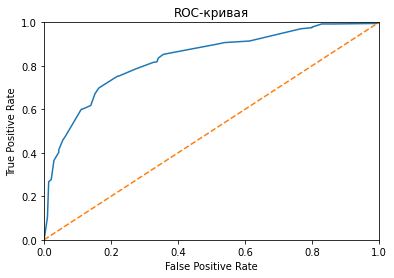

In [49]:
auc_roc4,medida4,probabilities_one_valid4 = F1Roc(best_clf_DTC_ds,X_valid,y_valid)

Модель даёт плохие показатели на F1-мере, но не самые плохие на ROC-score

Далее обучим DecisionTreeClassifier используя upsampled

### DecisionTreeClassifier upsmapled

In [50]:
dtc = DecisionTreeClassifier(random_state = 42)
params = {'criterion':['gini','entropy'],
          'max_depth': range(1,20)}
best_clf_DTC_us,best_param = GridSearch(dtc,params,features_upsampled,target_upsampled)

In [51]:
prediction_values = best_clf_DTC_us.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.510948905109489


На значении: 0.0 F1-мера равна: 0.510948905109489
На значении: 0.04 F1-мера равна: 0.510948905109489
На значении: 0.08 F1-мера равна: 0.510948905109489
На значении: 0.12 F1-мера равна: 0.510948905109489
На значении: 0.16 F1-мера равна: 0.510948905109489
На значении: 0.2 F1-мера равна: 0.510948905109489
На значении: 0.24 F1-мера равна: 0.510948905109489
На значении: 0.28 F1-мера равна: 0.510948905109489
На значении: 0.32 F1-мера равна: 0.510948905109489
На значении: 0.36 F1-мера равна: 0.510948905109489
На значении: 0.4 F1-мера равна: 0.510948905109489
На значении: 0.44 F1-мера равна: 0.510948905109489
На значении: 0.48 F1-мера равна: 0.510948905109489
На значении: 0.52 F1-мера равна: 0.510948905109489
---
Максимальная F1-мера равна: 0.5109 На пороге равном: 0.52, ROC-score: 0.694


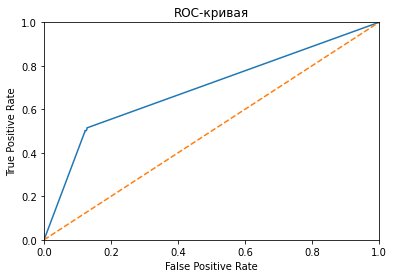

In [52]:
auc_roc5,medida5,probabilities_one_valid5 = F1Roc(best_clf_DTC_us,X_valid,y_valid)

Ддаа. DecisionTree upsampled нам тут вряд ли поможет 

Теперь обучим DecisionTreeClassifier используя параметр class_weight = 'balanced'

### DecisionTreeClassifier with class_weight balanced

In [53]:
dtc = DecisionTreeClassifier(random_state = 42,class_weight = 'balanced')
params = {'criterion':['gini','entropy'],
          'max_depth': range(1,20)}
best_clf_DTC_cwb,best_param = GridSearch(dtc,params,X_train,y_train)

In [54]:
prediction_values = best_clf_DTC_cwb.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.49879518072289153


На значении: 0.0 F1-мера равна: 0.49879518072289153
На значении: 0.04 F1-мера равна: 0.49879518072289153
На значении: 0.08 F1-мера равна: 0.49879518072289153
На значении: 0.12 F1-мера равна: 0.49879518072289153
На значении: 0.16 F1-мера равна: 0.49879518072289153
На значении: 0.2 F1-мера равна: 0.49879518072289153
На значении: 0.24 F1-мера равна: 0.49879518072289153
На значении: 0.28 F1-мера равна: 0.49879518072289153
На значении: 0.32 F1-мера равна: 0.49879518072289153
На значении: 0.36 F1-мера равна: 0.49879518072289153
На значении: 0.4 F1-мера равна: 0.49879518072289153
На значении: 0.44 F1-мера равна: 0.49879518072289153
На значении: 0.48 F1-мера равна: 0.49879518072289153
На значении: 0.52 F1-мера равна: 0.49879518072289153
---
Максимальная F1-мера равна: 0.4988 На пороге равном: 0.0, ROC-score: 0.686


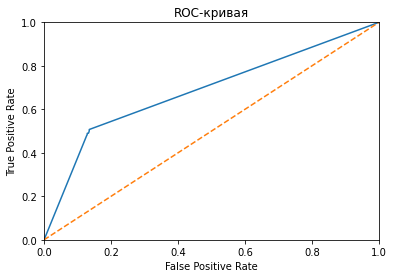

In [55]:
auc_roc6,medida6,probabilities_one_valid6 = F1Roc(best_clf_DTC_cwb,X_valid,y_valid)

Плоховата модель. Идём дальше

Далее обучим LogisticRegression с балансировкой классов

### LogisticRegression with class balanced

In [56]:
lrc = LogisticRegression(random_state=42, solver='liblinear', class_weight = 'balanced')
params = {'max_iter': [10,50,100,500,100]}
best_clf_lr_cwb,best_param = GridSearch(lrc,params,X_train,y_train)

In [57]:
prediction_values = best_clf_lr_cwb.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.5196581196581197


На значении: 0.0 F1-мера равна: 0.3388704318936877
На значении: 0.04 F1-мера равна: 0.3388704318936877
На значении: 0.08 F1-мера равна: 0.3407098121085595
На значении: 0.12 F1-мера равна: 0.34856898761213156
На значении: 0.16 F1-мера равна: 0.3617021276595745
На значении: 0.2 F1-мера равна: 0.3745318352059925
На значении: 0.24 F1-мера равна: 0.387192118226601
На значении: 0.28 F1-мера равна: 0.4012671594508976
На значении: 0.32 F1-мера равна: 0.428246013667426
На значении: 0.36 F1-мера равна: 0.44581280788177335
На значении: 0.4 F1-мера равна: 0.4713804713804714
На значении: 0.44 F1-мера равна: 0.4955882352941176
На значении: 0.48 F1-мера равна: 0.5150284321689683
На значении: 0.52 F1-мера равна: 0.520888888888889
---
Максимальная F1-мера равна: 0.5209 На пороге равном: 0.52, ROC-score: 0.794


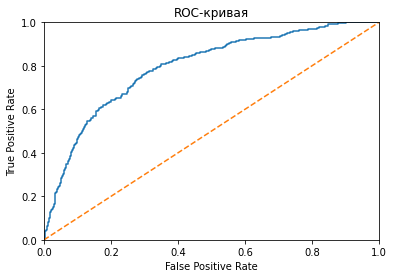

In [58]:
auc_roc7,medida7,probabilities_one_valid7 = F1Roc(best_clf_lr_cwb,X_valid,y_valid)

Как мы видим, LogisticRegression и с балансировкой классов и без неё даёт результаты сильно хуже чем все остальные модели,поэтому дальше рассматривать LogisticRegression не имеет смысла.

Теперь обучим 3 вида RandomForest. Первый upsampled

### RandomForestClassifier upsampled

In [59]:
rfc = RandomForestClassifier(random_state = 42,criterion = 'entropy')
params = {'max_depth': range(5,15),
          'n_estimators': range(5,15)}
best_clf_RFC_us,best_param = GridSearch(rfc,params,features_upsampled,target_upsampled)

In [60]:
prediction_values = best_clf_RFC_us.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.6129807692307692


На значении: 0.0 F1-мера равна: 0.347008547008547
На значении: 0.04 F1-мера равна: 0.37794533459000945
На значении: 0.08 F1-мера равна: 0.41343126967471144
На значении: 0.12 F1-мера равна: 0.44405997693194926
На значении: 0.16 F1-мера равна: 0.4716981132075471
На значении: 0.2 F1-мера равна: 0.5048143053645117
На значении: 0.24 F1-мера равна: 0.5353159851301115
На значении: 0.28 F1-мера равна: 0.556003223207091
На значении: 0.32 F1-мера равна: 0.5639686684073107
На значении: 0.36 F1-мера равна: 0.586337760910816
На значении: 0.4 F1-мера равна: 0.6006066734074823
На значении: 0.44 F1-мера равна: 0.6065217391304347
На значении: 0.48 F1-мера равна: 0.6187717265353418
На значении: 0.52 F1-мера равна: 0.6091245376078915
---
Максимальная F1-мера равна: 0.6188 На пороге равном: 0.48, ROC-score: 0.855


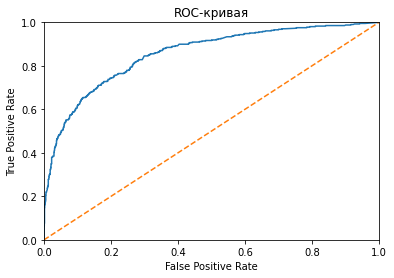

In [61]:
auc_roc8,medida8,probabilities_one_valid8 = F1Roc(best_clf_RFC_us,X_valid,y_valid)

Метрики довольно неплохие,посмотрим что будет дальше

Теперь downsampled

### RandomForestClassifier downsampled

In [62]:
rfc = RandomForestClassifier(random_state = 42,criterion = 'entropy')
params = {'max_depth': range(5,15),
          'n_estimators': range(5,15)}
best_clf_RFC_ds,best_param = GridSearch(rfc,params,features_downsampled,target_downsampled)

In [63]:
prediction_values = best_clf_RFC_ds.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.5913682277318641


На значении: 0.0 F1-мера равна: 0.3388704318936877
На значении: 0.04 F1-мера равна: 0.3388704318936877
На значении: 0.08 F1-мера равна: 0.3388704318936877
На значении: 0.12 F1-мера равна: 0.3425692695214106
На значении: 0.16 F1-мера равна: 0.356020942408377
На значении: 0.2 F1-мера равна: 0.370336669699727
На значении: 0.24 F1-мера равна: 0.3953033268101761
На значении: 0.28 F1-мера равна: 0.41850683491062035
На значении: 0.32 F1-мера равна: 0.4495412844036697
На значении: 0.36 F1-мера равна: 0.47953964194373394
На значении: 0.4 F1-мера равна: 0.5161290322580644
На значении: 0.44 F1-мера равна: 0.5537974683544304
На значении: 0.48 F1-мера равна: 0.5741878841088675
На значении: 0.52 F1-мера равна: 0.6009756097560977
---
Максимальная F1-мера равна: 0.601 На пороге равном: 0.52, ROC-score: 0.863


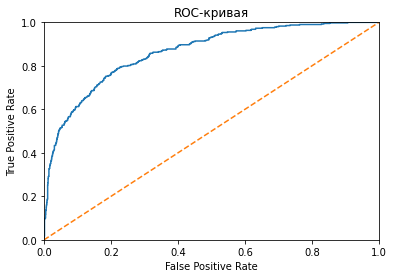

In [64]:
auc_roc9,medida9,probabilities_one_valid9 = F1Roc(best_clf_RFC_ds,X_valid,y_valid)

Метрики получились так себе. Слишком низкое значение F1. Продолжим

Осталось последнее RandomForest with class_weight = 'balanced'

### RandomForestClassifier class balanced

In [65]:
rfc = RandomForestClassifier(random_state = 42,criterion = 'gini',class_weight = 'balanced')
params = {'max_depth': range(5,15),
          'n_estimators': range(5,15)}
best_clf_RFC_wcb,best_param = GridSearch(rfc,params,X_train,y_train)

In [66]:
prediction_values = best_clf_RFC_wcb.predict(X_valid)
print(f'F1-мера равна: {f1_score(y_valid,prediction_values)}')

F1-мера равна: 0.5962059620596205


На значении: 0.0 F1-мера равна: 0.3676804357694054
На значении: 0.04 F1-мера равна: 0.39760239760239763
На значении: 0.08 F1-мера равна: 0.43896848137535815
На значении: 0.12 F1-мера равна: 0.4748567791215786
На значении: 0.16 F1-мера равна: 0.5133381398702235
На значении: 0.2 F1-мера равна: 0.5341712490180676
На значении: 0.24 F1-мера равна: 0.5577758470894875
На значении: 0.28 F1-мера равна: 0.5827814569536424
На значении: 0.32 F1-мера равна: 0.5959183673469388
На значении: 0.36 F1-мера равна: 0.6039823008849557
На значении: 0.4 F1-мера равна: 0.6060606060606061
На значении: 0.44 F1-мера равна: 0.6039603960396039
На значении: 0.48 F1-мера равна: 0.5966277561608301
На значении: 0.52 F1-мера равна: 0.5986206896551723
---
Максимальная F1-мера равна: 0.6061 На пороге равном: 0.4, ROC-score: 0.849


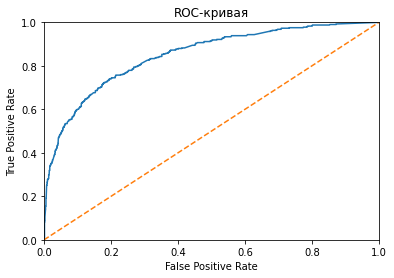

In [67]:
auc_roc10,medida10,probabilities_one_valid10 = F1Roc(best_clf_RFC_wcb,X_valid,y_valid)

### Один график

Вот тут метрики уже могут побороться за звание лучших. Надо вывести все модели на одном графике и посмотреть как это выглядит

In [68]:
all_models = [probabilities_one_valid1,probabilities_one_valid2,
              probabilities_one_valid4,probabilities_one_valid6,
              probabilities_one_valid8,probabilities_one_valid9, probabilities_one_valid10]

all_names = [f'DecisionTree no class_weight  F1:{medida1}  ROC:{auc_roc1}'
         ,f'RandomForest no class_weight  F1:{medida2}  ROC:{auc_roc2}',
         f'DecisionTree downsalpled  F1:{medida4}  ROC:{auc_roc4}',
         f'DecisionTree class weight balanced  F1:{medida6}  ROC:{auc_roc6}',
         f'RandomForest upsampled  F1:{medida8}  ROC:{auc_roc8}',
         f'RandomForest downsampled  F1:{medida9}  ROC:{auc_roc9}',
         f'RandomForest class balanced  F1:{medida10}  ROC:{auc_roc10}']  

def ItogF1Roc(mas,names,y_valid): 
    plt.figure(figsize=(15, 10))
    for X_valid, name in zip(mas, names):
            fpr, tpr, thresholds = roc_curve(y_valid,X_valid)
            plt.plot(fpr, tpr,label = name )
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1], linestyle='--')
            plt.xlim([0.0,1.0])
            plt.ylim([0.0,1.0])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate') 
            plt.title("ROC-кривая")

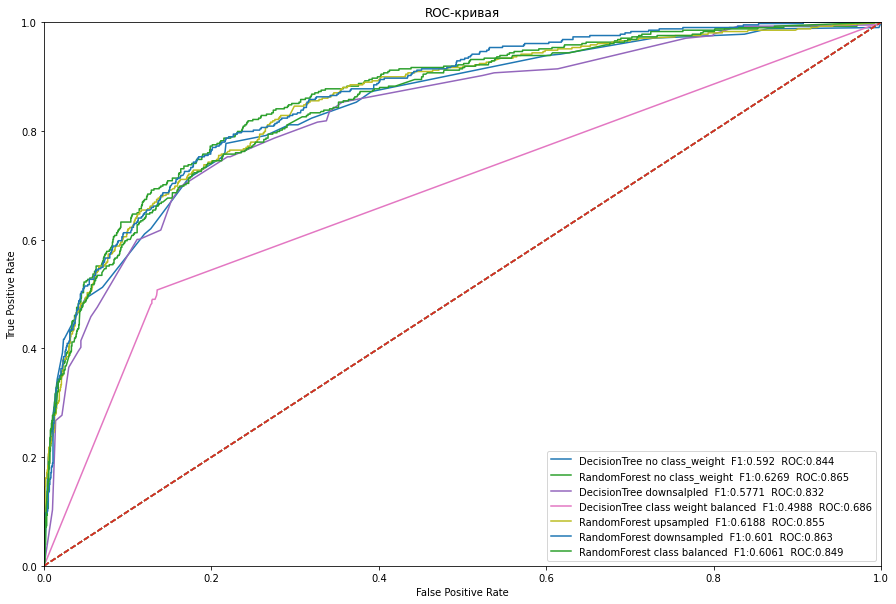

In [69]:
ItogF1Roc(all_models,all_names,y_valid)

Ожидалось, что разница будет чуть нагляднее, но ладно, вцелом и так можно выбрать 3 лучших модели исходя из 2ух параметров F1,AUC-ROC. Исходя из комбинации лучших метрик в тройке лидеров остаются:

1) RandomForest with class_wegith

2) RandomForest without class weight

3) RandomForest with upsampled

Теперь посмотрим на ROC-AUC трёх лучших моделей.

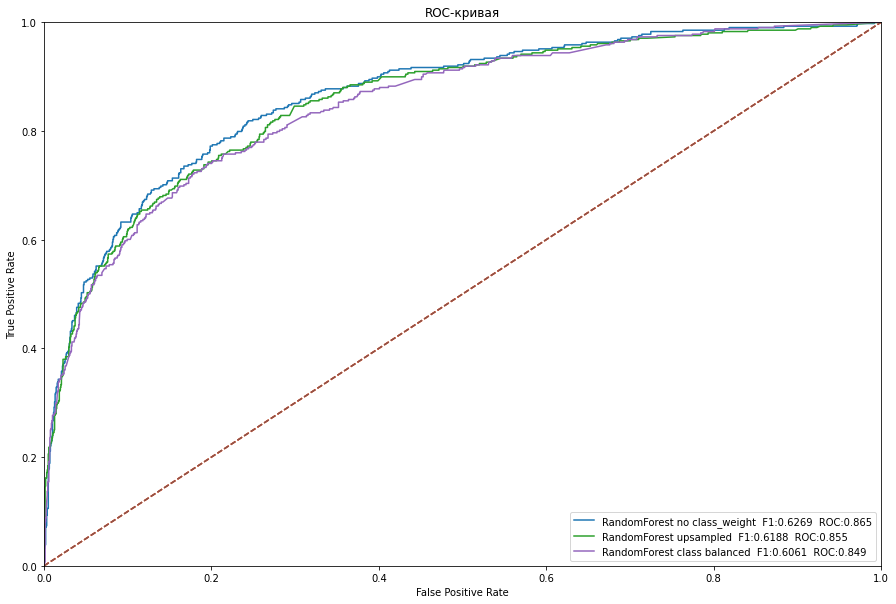

In [70]:
last_models = [probabilities_one_valid2,probabilities_one_valid8,probabilities_one_valid10]

last_names = [f'RandomForest no class_weight  F1:{medida2}  ROC:{auc_roc2}',
              f'RandomForest upsampled  F1:{medida8}  ROC:{auc_roc8}',
              f'RandomForest class balanced  F1:{medida10}  ROC:{auc_roc10}']


ItogF1Roc(last_models,last_names,y_valid)

ROC-AUC даже трёх лучших моделей получился малоинформативен так как они очень близки по качеству, хотя например DecisionTree очевидно проигрывает.
Удивительно, но получается, что RandomForest без балансировки классов оказалась лучшей моделью. Для полной уверенности протестируем эти 3 модели на тестовых данных.

## Тестирование модели

Проверим на тестовой выборке RandomForestClassifier без балансировки классов с лучшим порогом.

In [71]:
threshold = 0.32

predicted_proba = best_clf_RFC_ncw.predict_proba(X_test)
prediction_values = (predicted_proba [:,1] >= threshold).astype('int')
print(f'F1-мера равна: {f1_score(y_test,prediction_values)}')

F1-мера равна: 0.6041923551171393


Проверим на тестовой выборке RandomForestClassifier с балансировкой классов с помощью class_weight = balanced классов с лучшим порогом.

In [72]:
threshold = 0.4

predicted_proba = best_clf_RFC_wcb.predict_proba(X_test)
prediction_values = (predicted_proba [:,1] >= threshold).astype('int')
print(f'F1-мера равна: {f1_score(y_test,prediction_values)}')

F1-мера равна: 0.5851318944844124


Проверим на тестовой выборке DecisionTreeClassifier без балансировки классов с помощью  с лучшим порогом.

In [73]:
threshold = 0.48

predicted_proba = best_clf_RFC_us.predict_proba(X_test)
prediction_values = (predicted_proba [:,1] >= threshold).astype('int')
print(f'F1-мера равна: {f1_score(y_test,prediction_values)}')

F1-мера равна: 0.5844004656577416


## Вывод

Как следствие, можно сделать вывод, что RandomForestClassifier без балансировки классов в данном случае является лучшей моделью. Удивительно, почему так произошло, но тем не менее модель выдаёт такие данные.